<b>imports

In [44]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<b>file reading - Bruker

In [45]:
path_label = "20230531_CVD_3158"

input_file = open("./" + path_label + "_map/" + path_label + "_60s_10x10pts_roi_net_sum.txt", "r")

sample_name = "CVD" + path_label[-4:]

#dat_xx_dx are 10x10 arrays
dat_si_d1 = np.zeros((10, 10))
dat_ga_d1 = np.zeros((10, 10))

dat_si_d2 = np.zeros((10, 10))
dat_ga_d2 = np.zeros((10, 10))

ga_si_d1 = np.zeros((10, 10))
ga_si_d2 = np.zeros((10, 10))

#how this works: readline returns a single empty string ONLY IF the EOF is reached
s = input_file.readline().split(" ")
while s != [""]:

    if s[0][0] == "2": #check if it's a line containing data
        
        while "" in s:
        #cut empty strings out of s
            for j in range(0, len(s)):
                if s[j] == "":
                    del s[j]
                    break #you can only delete one element per pass because len(s) changes when you delete an element,
                          #and the loop needs to be re-run
                
        x = int(s[0][-3]) #x is the slower changing index
        y = int(s[0][-1]) #y is the most rapidly changing index
        si_counts = float(s[1])
        ga_counts = float(s[6])
        if s[0][-5] == "1": #separate into detector 1 and detector 2
            dat_si_d1[x][y] = si_counts
            dat_ga_d1[x][y] = ga_counts
            ga_si_d1[x][y] = ga_counts/si_counts
        elif s[0][-5] == "2":
            dat_si_d2[x][y] = si_counts
            dat_ga_d2[x][y] = ga_counts
            ga_si_d2[x][y] = ga_counts/si_counts
               
    s = input_file.readline().split(" ")
        
input_file.close()

<b>file reading - PyMca

<b>statistical processing

In [6]:
#vec_xx_dx are vectors containing the data in no particular order
vec_si_d1 = dat_si_d1.reshape(100)
vec_si_d2 = dat_si_d2.reshape(100)
vec_ga_d1 = dat_ga_d1.reshape(100)
vec_ga_d2 = dat_ga_d2.reshape(100)

vec_ga_si_d1 = ga_si_d1.reshape(100)
vec_ga_si_d2 = ga_si_d2.reshape(100)

def getStats(ar):
    """calculate and return the follwing statistical properties of ar:
    average
    standard deviation
    average, with 5 highest and lowest points removed
    standard deviation, with 5 highest and lowest points removed

    ar must be a 1d array
    """
    av = np.average(ar)
    std = np.sqrt(np.sum((ar-av)**2)/ar.size)

    trim = np.sort(ar)[5:-5]

    av_trim = np.average(trim)
    std_trim = np.sqrt(np.sum((trim-av_trim)**2)/trim.size)

    return av, std, av_trim, std_trim

avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1 = getStats(vec_si_d1)
avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2 = getStats(vec_si_d2)

avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1 = getStats(vec_ga_d1)
avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2 = getStats(vec_ga_d2)

avg_ga_si_d1, std_ga_si_d1, t_avg_ga_si_d1, t_std_ga_si_d1 = getStats(vec_ga_si_d1)
avg_ga_si_d2, std_ga_si_d2, t_avg_ga_si_d2, t_std_ga_si_d2 = getStats(vec_ga_si_d2)

print(sample_name + " Statistics")
print("\t\t\t\ttrimmed\ttrimmed")
print("Signal\tDet.\tAvg\tSTD\tavg\tstd")
print("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1))
print("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2))
print("Ga\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1))
print("Ga\td2\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2))
print("Ga/Si\td1\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(avg_ga_si_d1, std_ga_si_d1, t_avg_ga_si_d1, t_std_ga_si_d1))
print("Ga/Si\td2\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(avg_ga_si_d2, std_ga_si_d2, t_avg_ga_si_d2, t_std_ga_si_d2))


stats_out_file = open("./" + path_label + "_map/" + path_label + "_stats.txt", "w")

stats_out_file.write("\t\t\t\ttrimmed\ttrimmed\n")
stats_out_file.write("Signal\tDet.\tAvg\tSTD\tavg\tstd\n")
stats_out_file.write("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1))
stats_out_file.write("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2))
stats_out_file.write("Ga\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1))
stats_out_file.write("Ga\td2\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2))
stats_out_file.write("Ga/Si\td1\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\n".format(avg_ga_si_d1, std_ga_si_d1, t_avg_ga_si_d1, t_std_ga_si_d1))
stats_out_file.write("Ga/Si\td2\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\n".format(avg_ga_si_d2, std_ga_si_d2, t_avg_ga_si_d2, t_std_ga_si_d2))

stats_out_file.close()

CVD3158 Statistics
				trimmed	trimmed
Signal	Det.	Avg	STD	avg	std
Si	d1	339937	1164	339988	814
Si	d1	354071	1351	354164	962
Ga	d1	13131	131	13132	102
Ga	d2	13430	144	13430	117
Ga/Si	d1	0.0386	0.0004	0.0386	0.0003
Ga/Si	d2	0.0379	0.0004	0.0379	0.0003


<b>Generate probability plots

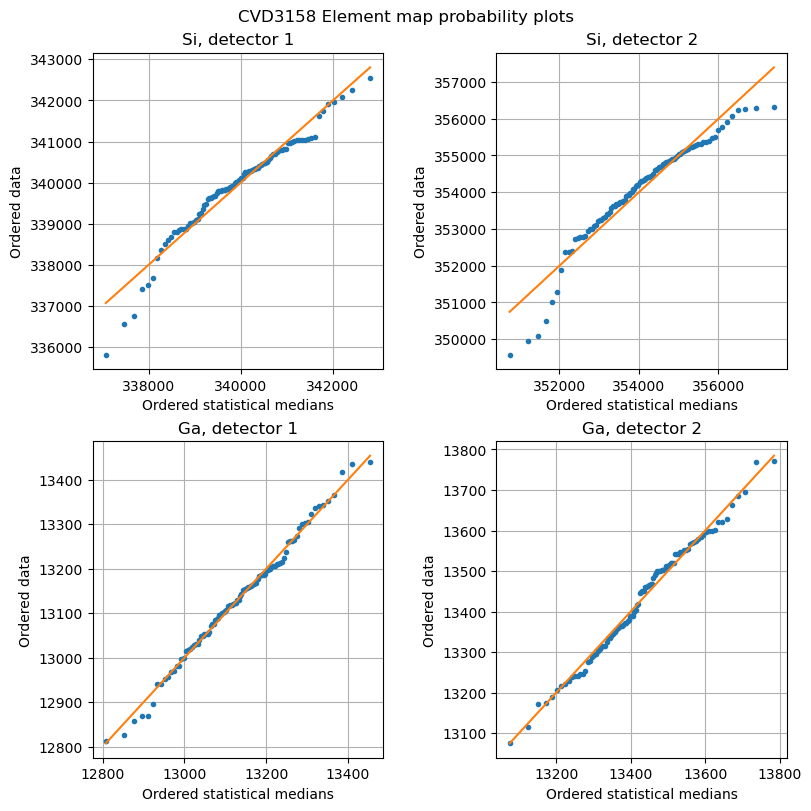

In [9]:
def probPlot(ax, dat, avg, std, title):
    osm, osr = stats.probplot(dat, (avg, std), dist="norm", fit=False)
    ax.plot(osm, osr, ".") #plot data
    ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, ((ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=2, ncols = 2, figsize = (8, 8), layout="constrained")

probPlot(ax7, vec_si_d1, avg_si_d1, std_si_d1, "Si, detector 1")
probPlot(ax9, vec_si_d2, avg_si_d2, std_si_d2, "Si, detector 2")
probPlot(ax8, vec_ga_d1, avg_ga_d1, std_ga_d1, "Ga, detector 1")
probPlot(ax10, vec_ga_d2, avg_ga_d2, std_ga_d2, "Ga, detector 2")

f.suptitle(sample_name + " Element map probability plots")

plt.savefig("./" + path_label + "_map/" + path_label + "_prob_plots.png",
            dpi="figure",
            format="png")

<b>plot heatmap results

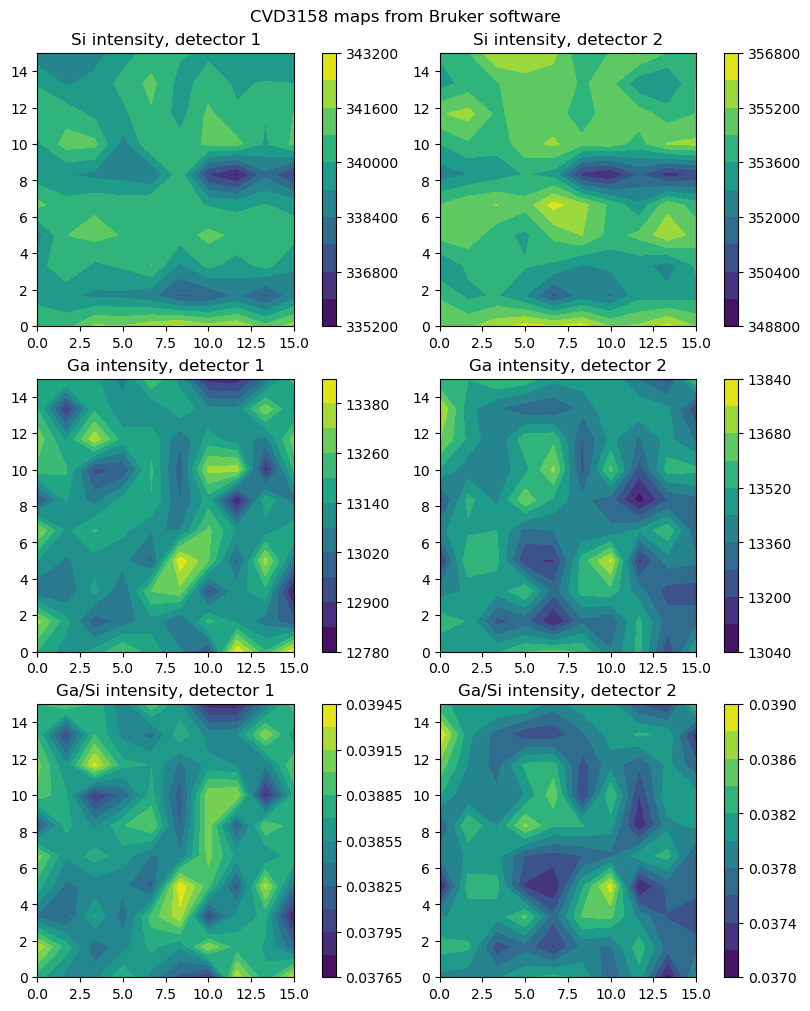

In [51]:
c="viridis"

fg, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), layout="constrained")

def drawMap(a, dat, cm, title):
    """draw contour plot
    dat is array of data to draw
    a is axes on which to draw it
    cm is the color map to use
    title is the title to write
    """
    im_pointer = a.contourf(dat, levels = 10, extent = [0, 15, 0, 15], cmap = cm)
    plt.colorbar(im_pointer, ax=a)
    a.set_title(title)

drawMap(ax1, dat_si_d1, c, "Si intensity, detector 1")
drawMap(ax2, dat_si_d2, c, "Si intensity, detector 2")

drawMap(ax3, dat_ga_d1, c, "Ga intensity, detector 1")
drawMap(ax4, dat_ga_d2, c, "Ga intensity, detector 2")

drawMap(ax5, dat_ga_d1/dat_si_d1, c, "Ga/Si intensity, detector 1")
drawMap(ax6, dat_ga_d2/dat_si_d2, c, "Ga/Si intensity, detector 2")

fg.suptitle(sample_name + " maps from Bruker software")

plt.savefig("./" + path_label + "_map/" + path_label + "_intensity_map.png",
            dpi="figure",
            format="png")

#for contourf(), [0][0] is displayed in the bottom left, [0][9] is in the bottom right
#for imshow(), [0][0] is displayed in the top left, [0][9] is in the top right